<a href="https://colab.research.google.com/github/camulro/Aprendizaje-I-new/blob/main/07_clustering_bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA y Clustering en series temporales financieras**

In [1]:
COLAB = True

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Carga de datos**

In [3]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1GWhI2wH1Ka_wFqsGAiZ-c8U91PYxewBN',
                                        dest_path="./datasets/financial_series.csv")

df = pd.read_csv('./datasets/financial_series.csv')
df.head(3)

,Date,Daimler DAX30,Deutsche Borse DAX30,Deutsche Bank DAX30,Deutsche Post DAX30,Deutsche Telekom DAX30,EON DAX30,Fresenius DAX30,Heidelberg Cement DAX30,Henkel DAX30,Infineon DAX30,Lufthansa DAX30,Linde DAX30,Lanxess DAX30,Merck DAX30,Munchener Ruck DAX30,RWE DAX30,SAP DAX30,KS DAX30,Siemens DAX30,Thyssen Krupp DAX30,Volkswagen Group DAX30,Adidas DAX30,Beiersdorf DAX30,Continental DAX30,Commerzbank DAX30,Allianz DAX30,BASF DAX30,Bayer DAX30,BMW DAX30,Coca Cola NASDAQ,McDonalds NASDAQ,3m NASDAQ,Nike NASDAQ,Pfizer NASDAQ,The Travelers Companies NASDAQ,United Technologies Corporation NASDAQ,Visa NASDAQ,Verizon Communications NASDAQ,WalMart NASDAQ,Chevron NASDAQ,Home Depot NASDAQ,IBM NASDAQ,Intel NASDAQ,Microsoft NASDAQ,Procter Gamble NASDAQ,Cisco NASDAQ,American Express NASDAQ,Boeing NASDAQ,Caterpillar NASDAQ,Walt Disney NASDAQ,General Electric NASDAQ,Goldman Sachs NASDAQ,JP Morgan Chase NASDAQ
0,2011-01-09,54.53,53.30,41.010,13.025,9.857,22.655,62.00,45.455,45.980,7.034,17.255,109.7,55.65,61.03,113.35,50.96,38.075,56.31,89.72,30.37,127.85,47.59,42.50,58.01,3.29341,90.65,57.38,55.71,59.40,31.46,74.37,86.23,20.88,18.34,53.33,79.08,18.24,35.93,54.08,91.190002,34.380001,147.929993,20.66,28.600000,64.500000,20.97,44.36,69.38,93.73,39.45,18.43,170.69,43.64
1,2011-01-16,55.95,56.89,43.260,13.350,9.633,23.840,60.61,47.595,47.305,7.340,16.970,107.9,55.12,59.98,112.25,53.27,40.180,55.50,91.07,30.70,125.75,46.97,40.90,60.00,3.26760,93.70,57.60,55.16,58.76,31.56,74.06,88.10,21.02,18.34,54.63,79.08,17.78,35.46,54.81,92.830002,35.889999,150.000000,21.08,28.299999,65.529999,21.21,46.25,70.07,94.01,39.29,18.82,175.00,44.91
2,2011-01-23,54.78,57.30,44.275,13.565,9.940,25.070,59.90,47.640,44.700,7.270,15.810,105.3,53.38,60.41,115.45,55.26,40.130,52.55,92.35,29.95,114.00,44.84,40.19,58.23,3.39372,97.91,56.30,54.21,55.65,31.38,75.01,89.29,20.58,18.36,55.00,80.20,17.54,34.95,55.73,93.779999,36.509998,155.500000,20.82,28.020000,65.910004,20.72,46.00,71.68,92.75,39.74,19.74,166.20,45.29


Ha mezclado datos de la bolsa americana y alemana.

In [ ]:
df.shape

(277, 54)

In [4]:
dates_orig = [datetime.strptime(d, "%Y-%m-%d").date() for d in df["Date"]]
names = list(df.columns[1:])
series_orig = df.iloc[:,1:].values.T

In [5]:
# Nos quedamos con los últimos puntos temporales para simplificar
dates_orig = dates_orig[-200:]
series_orig = series_orig[:,-200:]

In [6]:
print(np.shape(dates_orig))
series_orig.shape

(200,)


(53, 200)

# **Preprocesado de datos**

(53, 199)


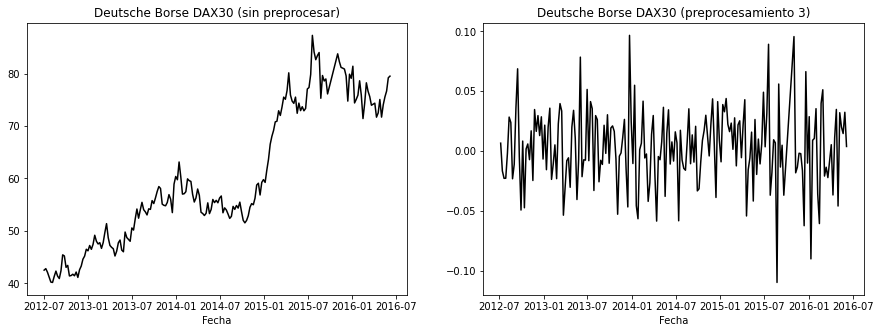

In [7]:
PREPROCESAMIENTO = 3
                        # 0: no hay preprocesamiento (tabajamos con las series originales)
                        # 1: estandarización (media de cada serie 0,  std 1)
                        # 2: incrementos relativos
                        # 3: incrementos relativos logarítmicos ("rendimientos logarítmicos")

ncompanies = len(names)
series_preproc = series_orig.copy()
dates = dates_orig.copy()

if PREPROCESAMIENTO == 0:
    pass
elif PREPROCESAMIENTO == 1:
    for i in range(len(series_orig)):
        series_preproc[i] = (series_orig[i]-np.mean(series_orig[i]))/np.std(series_orig[i])
elif PREPROCESAMIENTO == 2:
    # división componente a componente
    series_preproc = np.divide(series_orig[:,1:], series_orig[:,0:-1]) - 1
    dates = dates[1:] # perdemos un punto temporal
else:
    # log de las divisiones componente a componente
    series_preproc = np.log(np.divide(series_orig[:,1:], series_orig[:,0:-1])) #redimientos logarítmicos, es una forma de normalizar
    dates = dates[1:] # perdemos un punto temporal

ndates = len(dates)

print(series_preproc.shape)

EMPRESA_EJEMPLO = 1

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(dates_orig, series_orig[EMPRESA_EJEMPLO,:], 'k')
plt.title(names[EMPRESA_EJEMPLO]+" (sin preprocesar)")
plt.xlabel('Fecha')

plt.subplot(1,2,2)
plt.plot(dates, series_preproc[EMPRESA_EJEMPLO,:], 'k')
plt.title(names[EMPRESA_EJEMPLO]+" (preprocesamiento %d)"%PREPROCESAMIENTO)
plt.xlabel('Fecha')
plt.show()

# **Clustering con k-means (usando las series temporales)**

*** K-Means ***

Número de compañías en el cluster 0: 24
Número de compañías en el cluster 1: 1
Número de compañías en el cluster 2: 27
Número de compañías en el cluster 3: 1

Compañías en el cluster 0:

--- Coca Cola NASDAQ
--- McDonalds NASDAQ
--- 3m NASDAQ
--- Nike NASDAQ
--- Pfizer NASDAQ
--- The Travelers Companies NASDAQ
--- United Technologies Corporation NASDAQ
--- Visa NASDAQ
--- Verizon Communications NASDAQ
--- WalMart NASDAQ
--- Chevron NASDAQ
--- Home Depot NASDAQ
--- IBM NASDAQ
--- Intel NASDAQ
--- Microsoft NASDAQ
--- Procter Gamble NASDAQ
--- Cisco NASDAQ
--- American Express NASDAQ
--- Boeing NASDAQ
--- Caterpillar NASDAQ
--- Walt Disney NASDAQ
--- General Electric NASDAQ
--- Goldman Sachs NASDAQ
--- JP Morgan Chase NASDAQ


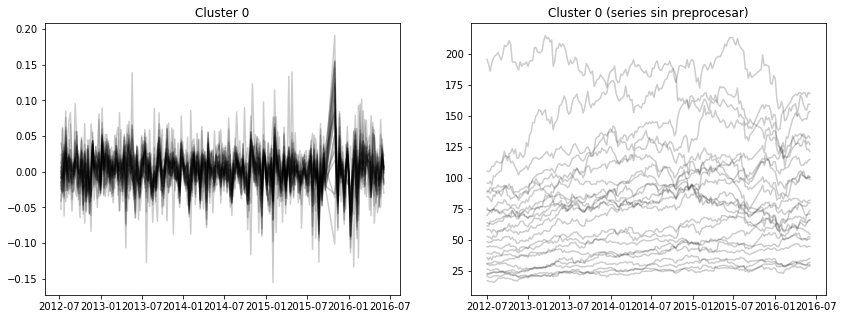


Compañías en el cluster 1:

--- Commerzbank DAX30


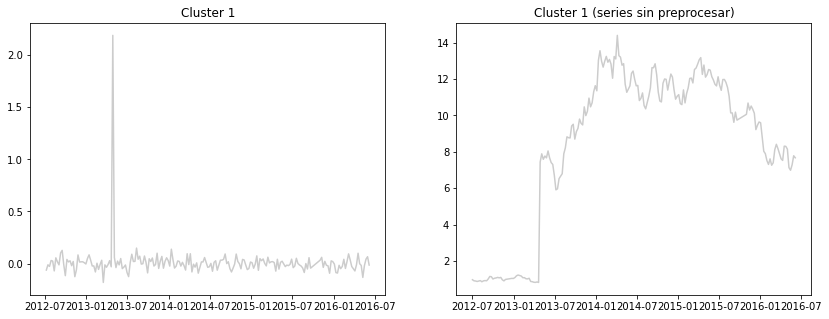


Compañías en el cluster 2:

--- Daimler DAX30
--- Deutsche Borse DAX30
--- Deutsche Bank DAX30
--- Deutsche Post DAX30
--- Deutsche Telekom DAX30
--- EON DAX30
--- Heidelberg Cement DAX30
--- Henkel DAX30
--- Infineon DAX30
--- Lufthansa DAX30
--- Linde DAX30
--- Lanxess DAX30
--- Merck DAX30
--- Munchener Ruck DAX30
--- RWE DAX30
--- SAP DAX30
--- KS DAX30
--- Siemens DAX30
--- Thyssen Krupp DAX30
--- Volkswagen Group DAX30
--- Adidas DAX30
--- Beiersdorf DAX30
--- Continental DAX30
--- Allianz DAX30
--- BASF DAX30
--- Bayer DAX30
--- BMW DAX30


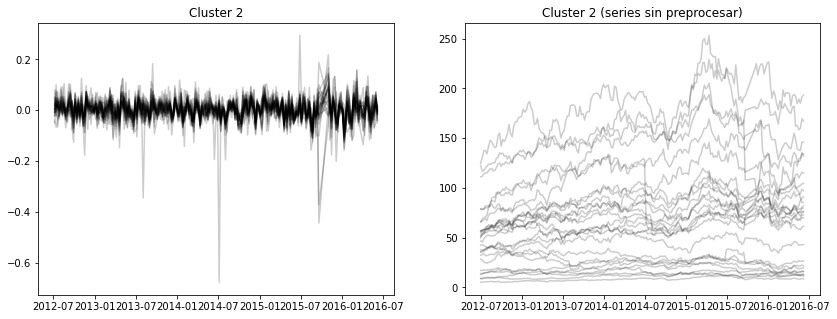


Compañías en el cluster 3:

--- Fresenius DAX30


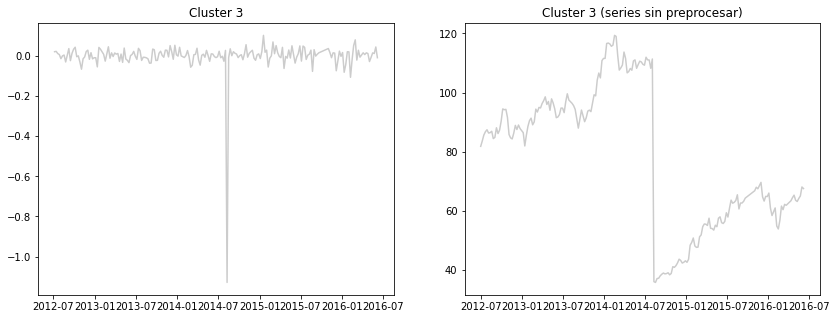

In [8]:
from sklearn.cluster import KMeans

nclusters = 4 # parámetro que se puede cambiar

kmns = KMeans(n_clusters=nclusters, random_state = 1,
              n_init=100)

kmns.fit(series_preproc)
ids_clusters = kmns.labels_.tolist()


print('*** K-Means ***\n')
for i in range(nclusters):
    print("Número de compañías en el cluster %d: %d" % (i, ids_clusters.count(i)))
    
for i in range(nclusters):
    print("\nCompañías en el cluster %d:\n" % i)
    inds = (np.where(np.array(ids_clusters) == i))[0]
    for j in range(len(inds)):
        print("--- %s" % names[inds[j]])
    if PREPROCESAMIENTO == 0:
        plt.figure(figsize=(7,5))
        plt.plot(dates, (series_preproc[inds]).T, "k", alpha=0.2)
        plt.title("Cluster %d"%i)
        plt.show()
    else:
        plt.figure(figsize=(14,5))
        plt.subplot(1,2,1)
        plt.plot(dates, (series_preproc[inds]).T, "k", alpha=0.2)
        plt.title("Cluster %d"%i)
        plt.subplot(1,2,2)
        plt.plot(dates_orig, (series_orig[inds]).T, "k", alpha=0.2)
        plt.title("Cluster %d (series sin preprocesar)"%i)        
        plt.show()

El cluster 1 y el cluster 3 son anomalías.

# **Clustering jerárquico (usando las series temporales)**

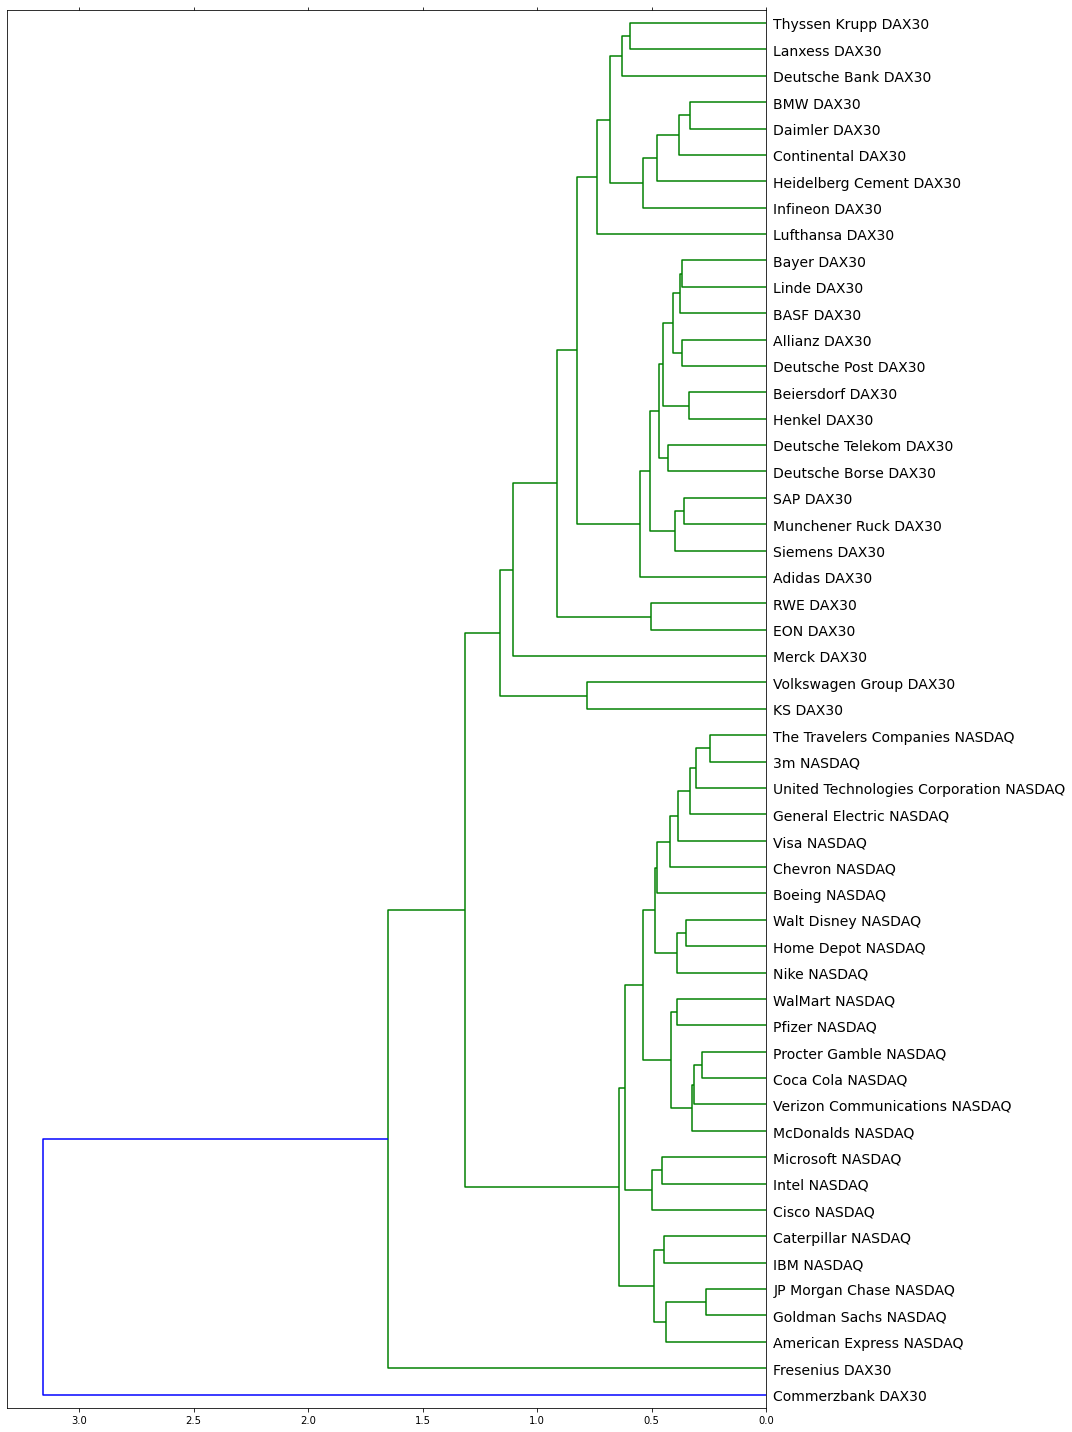

In [9]:
# Opción 1: trabajamos con las series preprocesadas

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(series_preproc, "ward")

plt.figure(figsize=(15,20))
dendr = dendrogram(Z, orientation="left", labels=names,
                   leaf_font_size=14)

inds_leaves = dendr['leaves']

plt.tick_params(axis = 'x',
                which = 'both',
                bottom = 'off',
                top = 'off',
                labelbottom = 'off')

plt.tight_layout()
#plt.savefig('dendrograma_series.png', dpi = 300)

Está fusionando compañías cuyo rendimiento logarítmico es muy parecido.

# **PCA usando las series temporales**

Text(0, 0.5, 'Principal component 2')

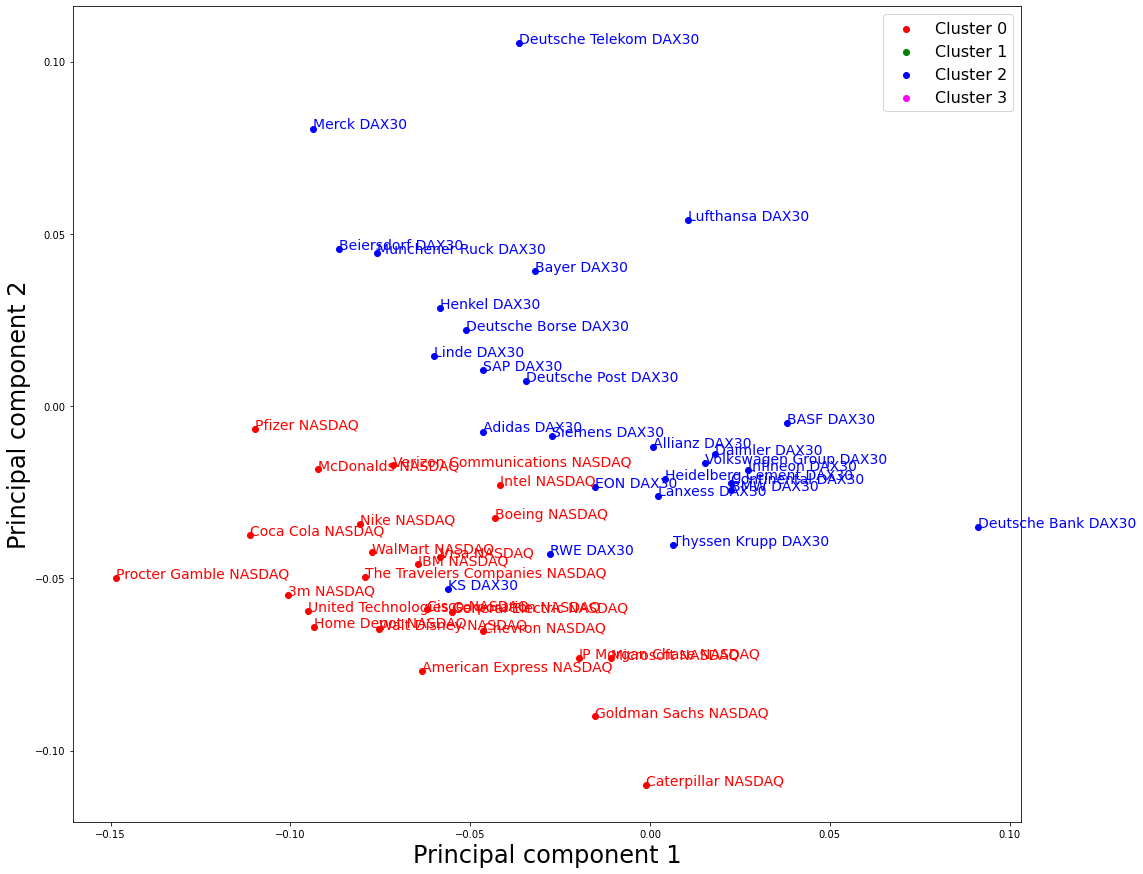

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(series_preproc)
# We do not scale the information X since all the correlations
# share the same scale (from -1 to 1)

pc_x = 0
pc_y = 1
X = pca.transform(series_preproc)

#plt.figure(figsize=(17, 15))
fig, ax = plt.subplots(figsize=(17,15))
#ax.axis([0, 0.5, 0, 0.5])

colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'magenta', 4: 'black'}

nclusters = len(np.unique(ids_clusters))

excluir = ["Fresenius DAX30", "Commerzbank DAX30"]

for c in range(nclusters):
    inds = (np.where(np.array(ids_clusters) == c))[0]
    inds = [ind for ind in inds if names[ind] not in excluir]
#    ax.plot(X[inds,pc_x], X[inds,pc_y], 'o', c = colors[c],
#            label = 'Cluster %d' % (c))
    ax.scatter(X[inds,pc_x], X[inds,pc_y],
               marker = 'o', c = colors[c],
               label = 'Cluster %d' % (c))

for i in range(len(X)):
    if names[i] not in excluir:
        plt.text(X[i,pc_x], X[i,pc_y], names[i], size=14, 
                color=colors[ids_clusters[i]])

plt.legend(fontsize=16)
plt.xlabel('Principal component '+str(pc_x+1), fontsize=24)
plt.ylabel('Principal component '+str(pc_y+1), fontsize=24)
#plt.savefig('PCA_series.png', dpi = 300)

# **Repetimos los mismos análisis pero trabajando con la matriz de correlación (correlaciones de cada compañía con las otras)**

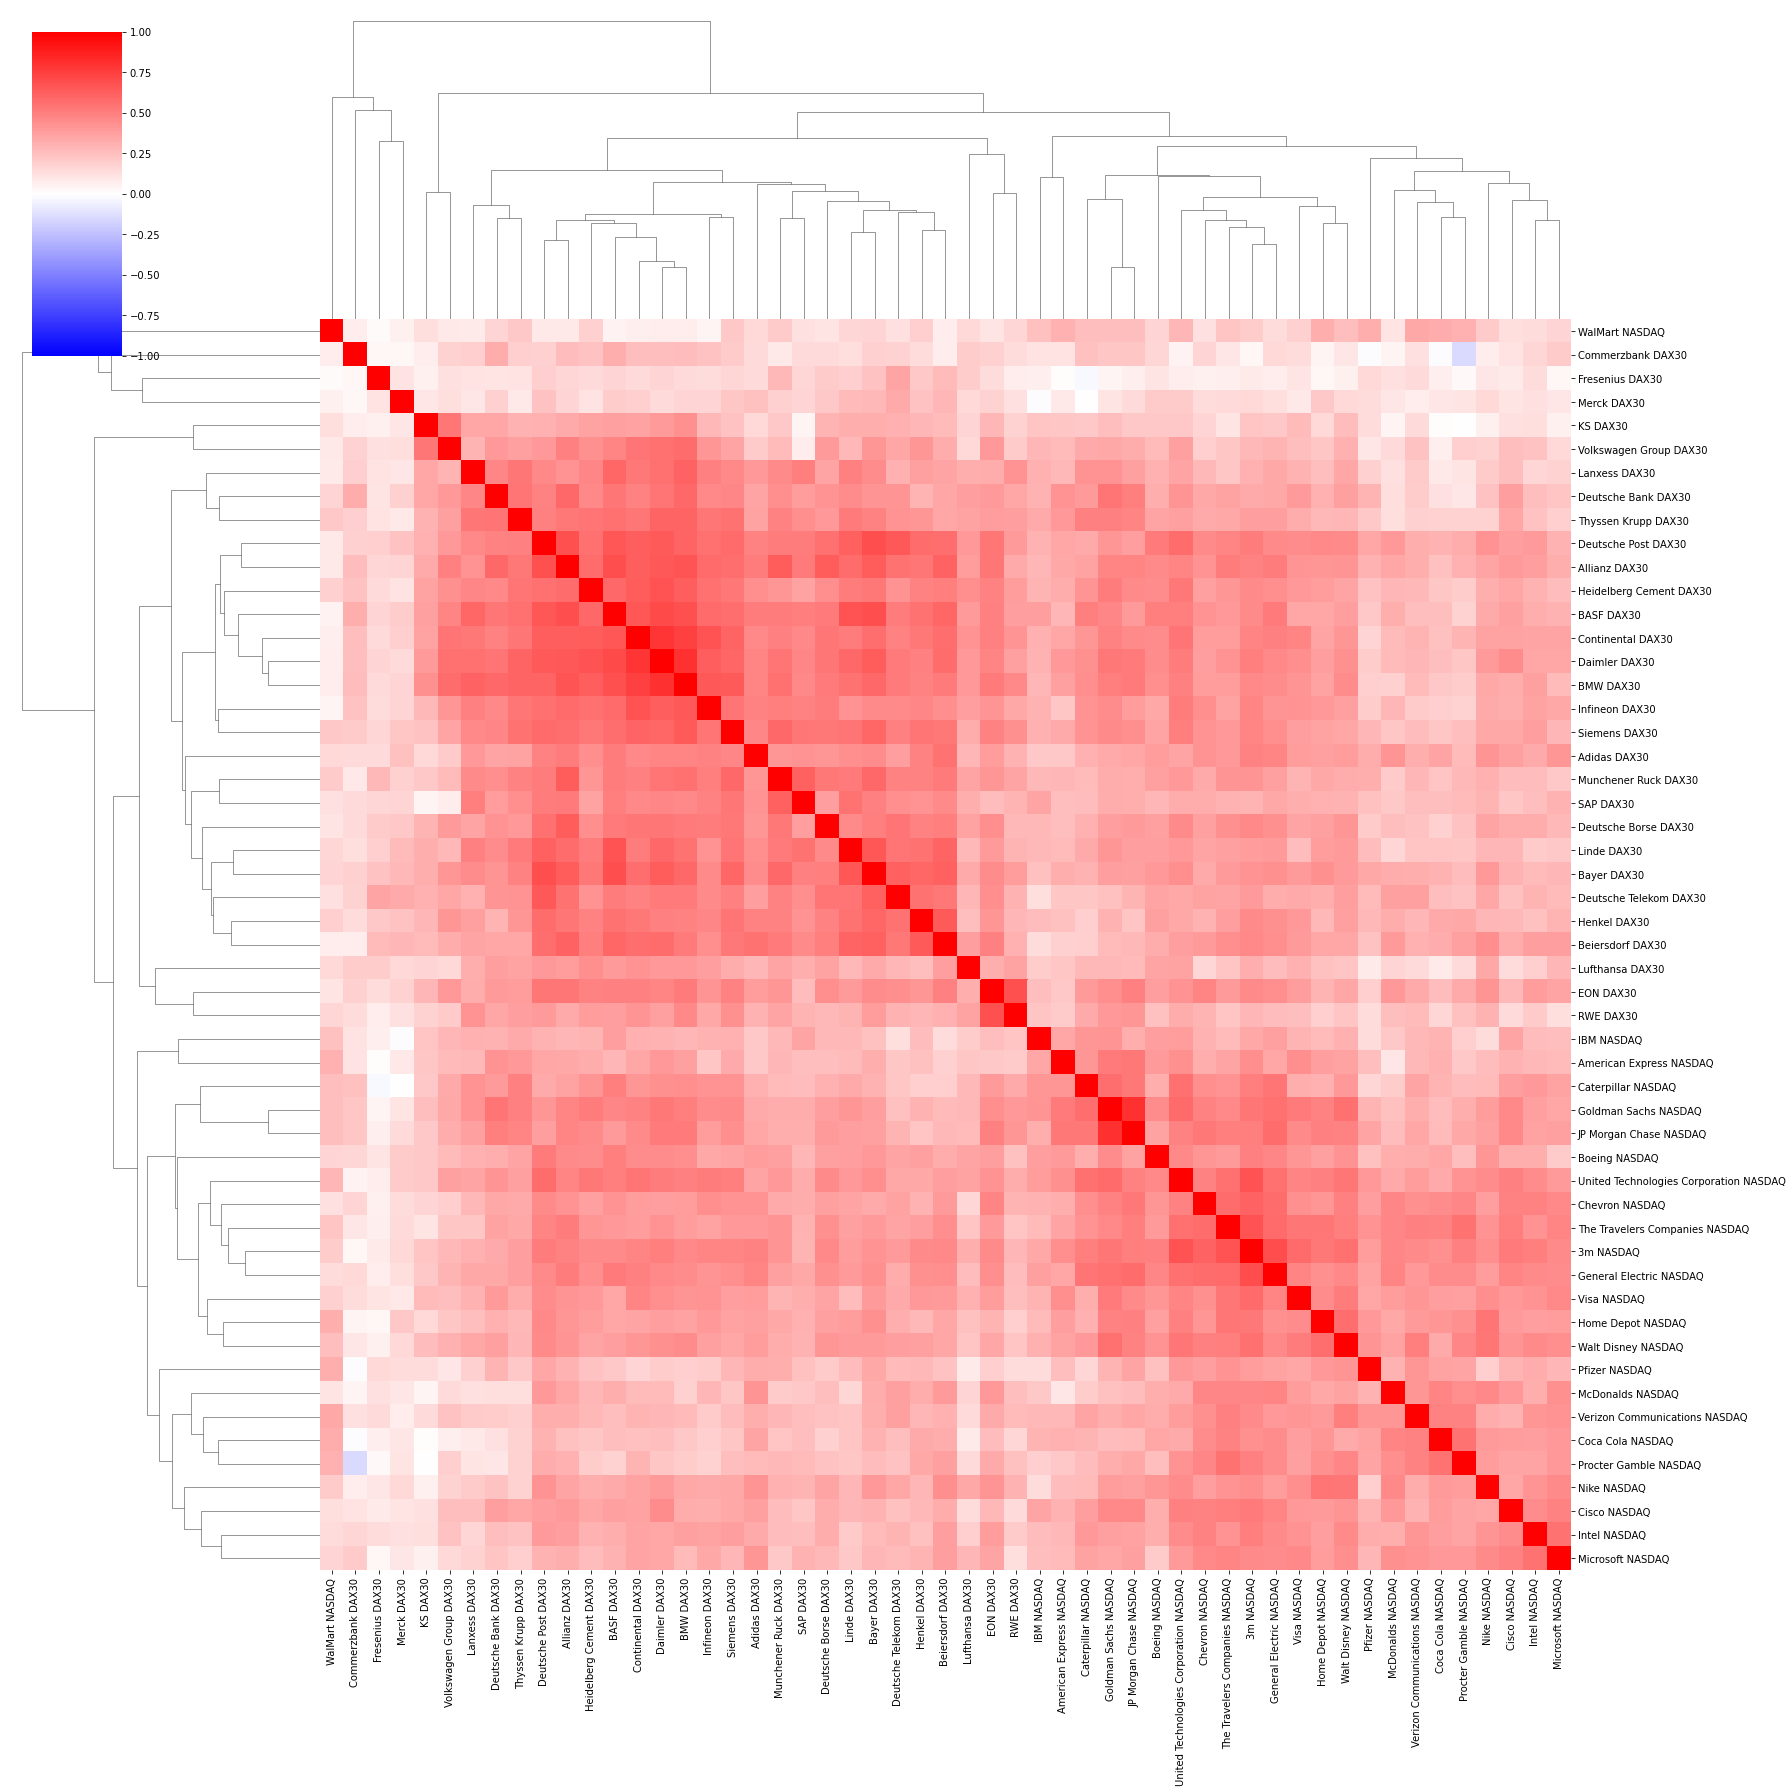

In [ ]:
correlaciones = pd.DataFrame(series_preproc.T, columns=names).corr()
sns.clustermap(correlaciones, figsize=(25,25), cmap="bwr", vmin=-1, vmax=1);

# **Clustering con k-means (usando las correlaciones)**

*** K-Means ***

Número de compañías en el cluster 0: 22
Número de compañías en el cluster 1: 8
Número de compañías en el cluster 2: 9
Número de compañías en el cluster 3: 14

Compañías en el cluster 0:

--- Daimler DAX30
--- Deutsche Borse DAX30
--- Deutsche Bank DAX30
--- Deutsche Post DAX30
--- Deutsche Telekom DAX30
--- EON DAX30
--- Heidelberg Cement DAX30
--- Henkel DAX30
--- Infineon DAX30
--- Linde DAX30
--- Lanxess DAX30
--- Munchener Ruck DAX30
--- SAP DAX30
--- Siemens DAX30
--- Thyssen Krupp DAX30
--- Adidas DAX30
--- Beiersdorf DAX30
--- Continental DAX30
--- Allianz DAX30
--- BASF DAX30
--- Bayer DAX30
--- BMW DAX30


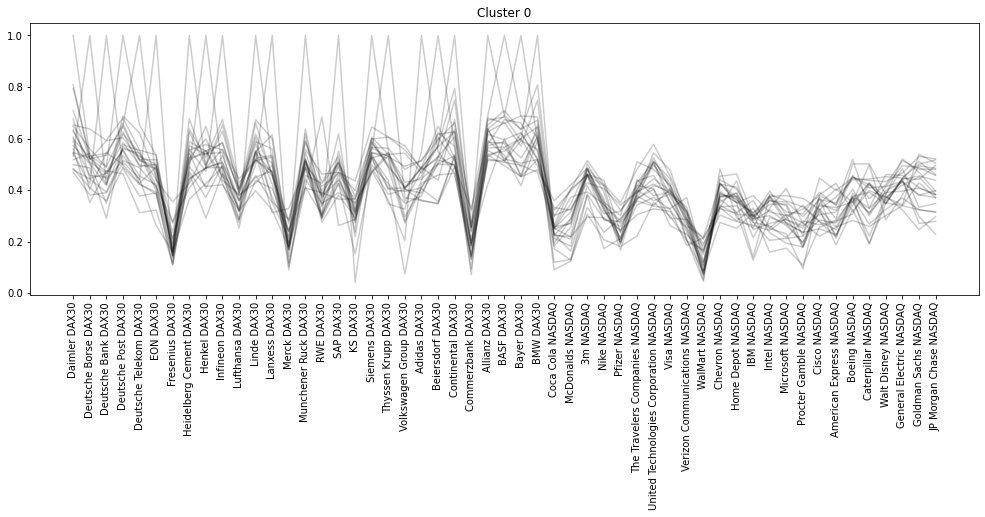


Compañías en el cluster 1:

--- Coca Cola NASDAQ
--- McDonalds NASDAQ
--- Nike NASDAQ
--- Pfizer NASDAQ
--- Verizon Communications NASDAQ
--- Intel NASDAQ
--- Microsoft NASDAQ
--- Procter Gamble NASDAQ


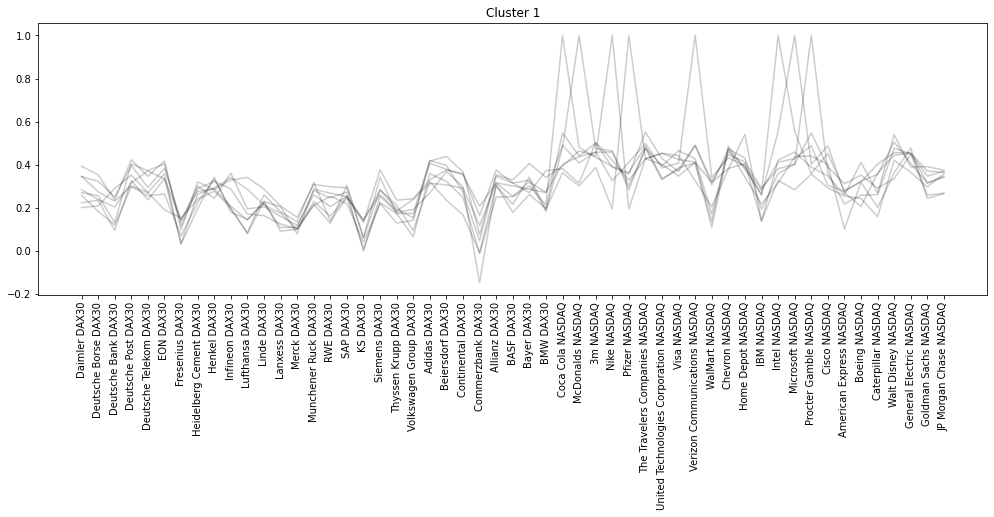


Compañías en el cluster 2:

--- Fresenius DAX30
--- Lufthansa DAX30
--- Merck DAX30
--- RWE DAX30
--- KS DAX30
--- Volkswagen Group DAX30
--- Commerzbank DAX30
--- WalMart NASDAQ
--- IBM NASDAQ


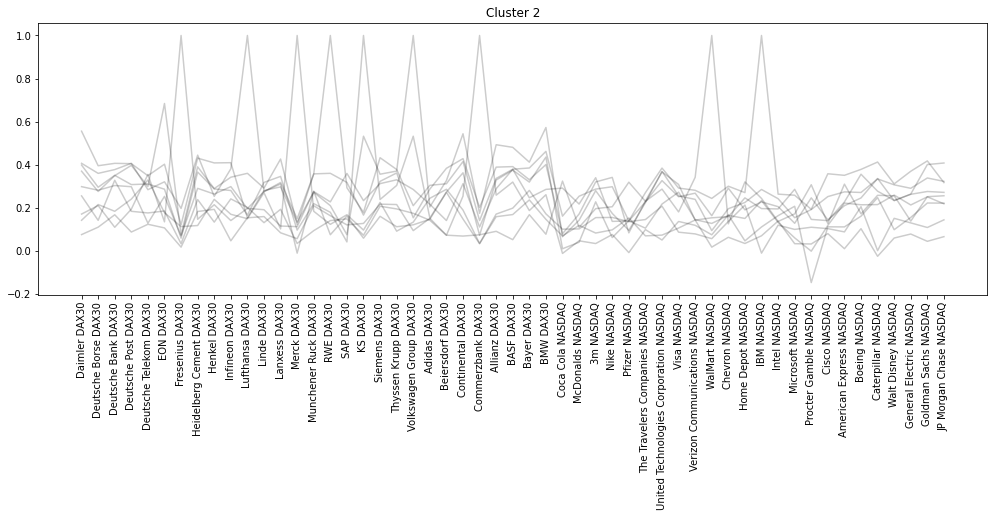


Compañías en el cluster 3:

--- 3m NASDAQ
--- The Travelers Companies NASDAQ
--- United Technologies Corporation NASDAQ
--- Visa NASDAQ
--- Chevron NASDAQ
--- Home Depot NASDAQ
--- Cisco NASDAQ
--- American Express NASDAQ
--- Boeing NASDAQ
--- Caterpillar NASDAQ
--- Walt Disney NASDAQ
--- General Electric NASDAQ
--- Goldman Sachs NASDAQ
--- JP Morgan Chase NASDAQ


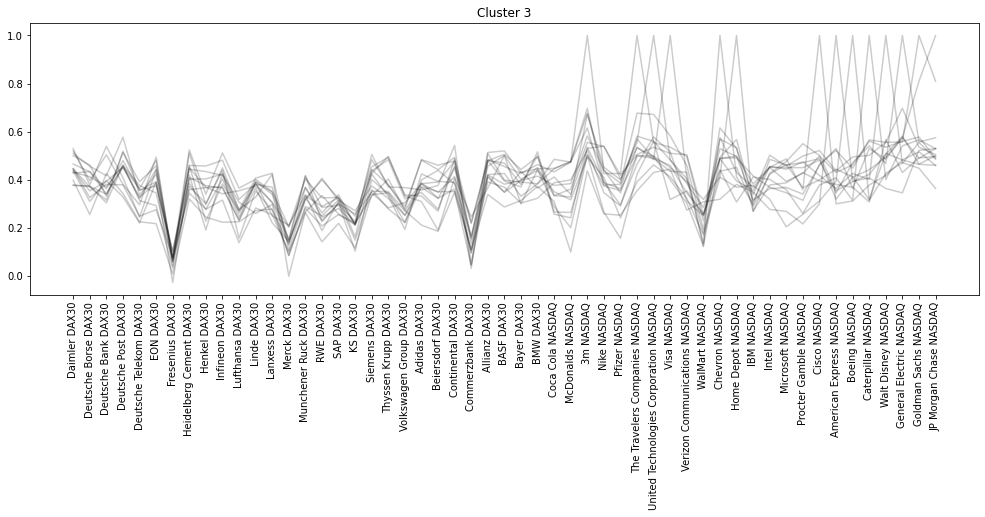

In [ ]:
kmns = KMeans(n_clusters=nclusters, random_state = 1, n_init=100)

kmns.fit(correlaciones)
ids_clusters = kmns.labels_.tolist()


print('*** K-Means ***\n')
for i in range(nclusters):
    print("Número de compañías en el cluster %d: %d" % (i, ids_clusters.count(i)))
    
for i in range(nclusters):
    print("\nCompañías en el cluster %d:\n" % i)
    inds = (np.where(np.array(ids_clusters) == i))[0]
    for j in range(len(inds)):
        print("--- %s" % names[inds[j]])
    plt.figure(figsize=(17,5))
    plt.plot(correlaciones.iloc[:,inds], "k", alpha=0.2)
    plt.xticks(rotation=90)
    plt.title("Cluster %d"%i)
    plt.show()

# **Clustering jerárquico (usando las correlaciones)**

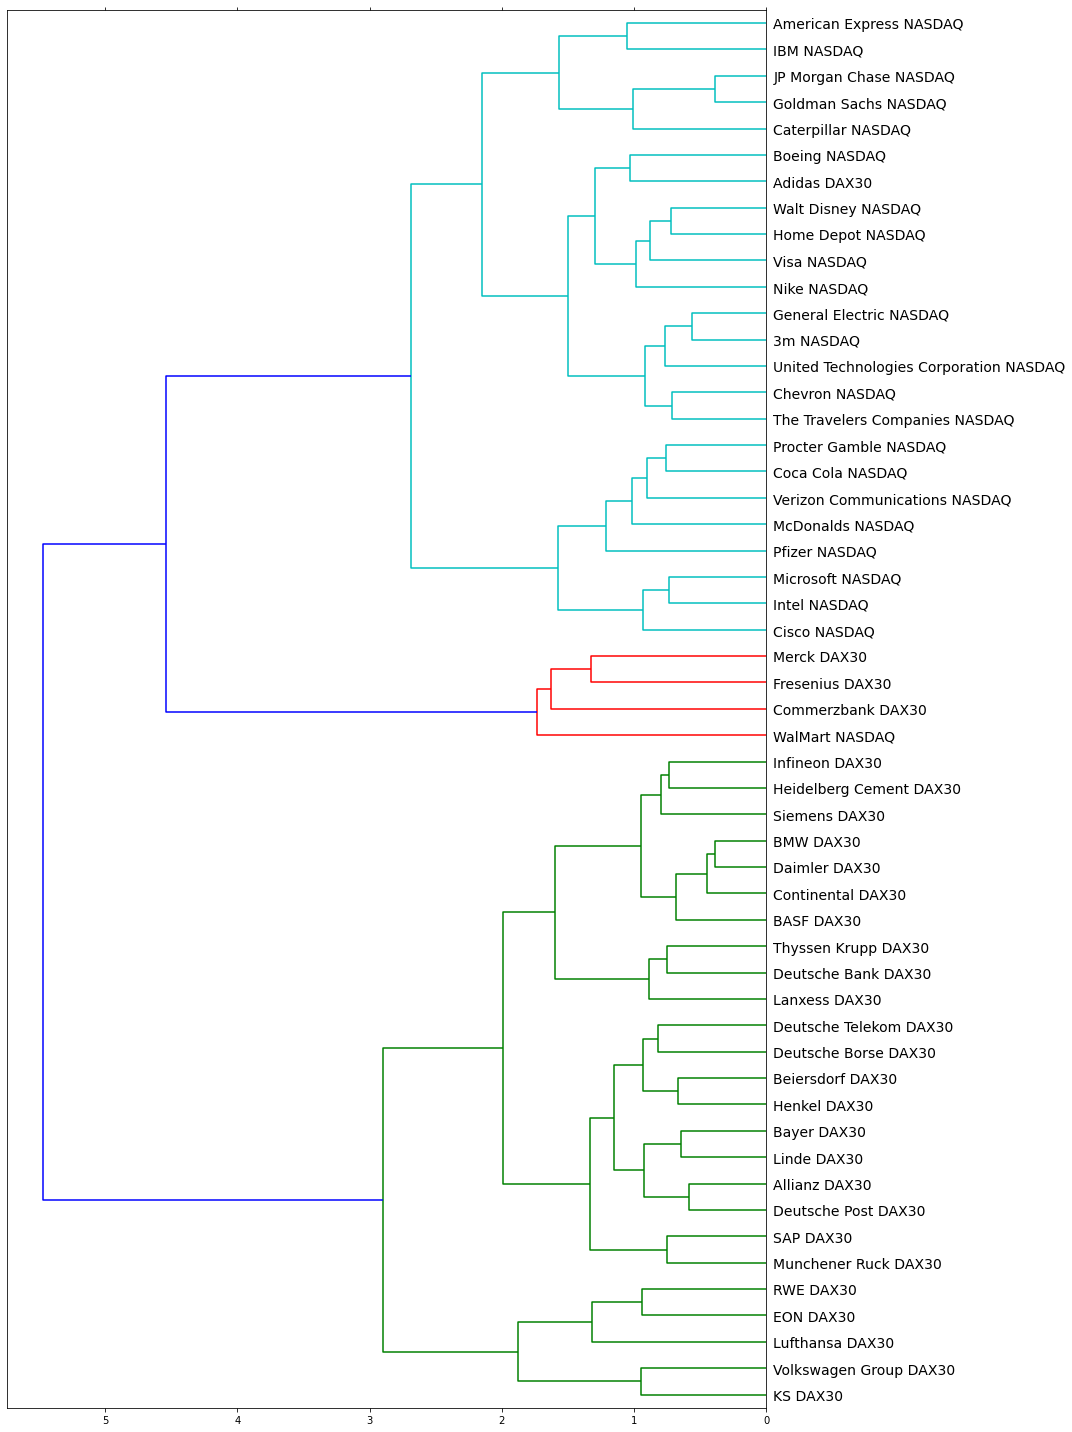

In [ ]:
Z = linkage(correlaciones, "ward")

plt.figure(figsize=(15,20))
dendr = dendrogram(Z, orientation="left", labels=names,
                   leaf_font_size=14)

inds_leaves = dendr['leaves']

plt.tick_params(axis = 'x',
                which = 'both',
                bottom = 'off',
                top = 'off',
                labelbottom = 'off')

plt.tight_layout();
#plt.savefig('dendrograma2.png', dpi = 300)

# **PCA usando los vectores de correlaciones**

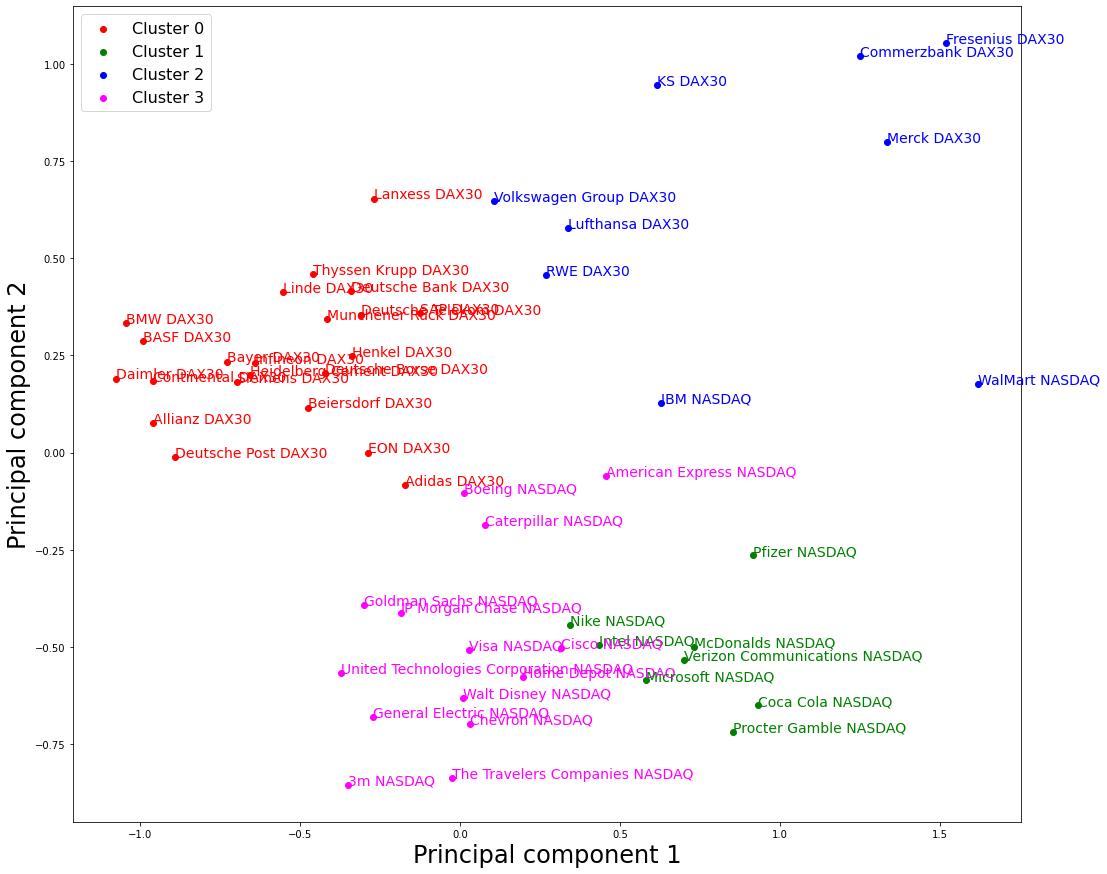

In [ ]:
pc_x = 0
pc_y = 1
pca = PCA(n_components=2)
pca.fit(correlaciones)
# We do not scale the information X since all the correlations
# share the same scale (from -1 to 1)

X = pca.transform(correlaciones)

fig, ax = plt.subplots(figsize=(17, 15))
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'magenta', 4: 'black'}

for i in range((np.shape(X))[0]):
    ax.text(X[i,pc_x], X[i,pc_y], names[i], size=14,
            color=colors[ids_clusters[i]])

nclusters = len(np.unique(ids_clusters))

for c in range(nclusters):
    inds = (np.where(np.array(ids_clusters) == c))[0]
    plt.scatter(X[inds,pc_x], X[inds,pc_y],
                marker = 'o', c = colors[c],
                label = 'Cluster %d' % (c))

plt.legend(fontsize=16)
plt.xlabel('Principal component '+str(pc_x+1), fontsize=24)
plt.ylabel('Principal component '+str(pc_y+1), fontsize=24);
#plt.savefig('PCA_correlaciones.png', dpi = 300)